# Model Building and Selection

## Initial Model Testing

### Multiple Linear Regression

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

In [12]:
# Load the data into a dataframe
df = pd.read_csv('../Data/scaled_data.csv')
df


,Per_Dependency,Per_No_High_School_Diploma,2020_HH_SIZE,MED_AGE,per_white,per_hisp,per_black,per_asian,per_other,MEDINC,Per_Unemployment,pop_dens_sqmi,stop_dens_sqmi
0,-0.973337,-0.284826,-1.128451,-0.415708,0.625400,-0.273202,-0.257450,-0.095778,1.301235,-0.472793,-0.836434,2.301314,54.891304
1,0.342008,-0.162622,0.665484,-0.209633,0.540069,-0.245387,-0.659805,1.355876,2.157760,-0.052162,-0.778808,1.165326,55.524079
2,-1.887156,-0.651440,-1.681458,-0.020191,0.964372,-0.417658,-0.491639,0.365806,0.702641,-0.054291,-0.807621,1.544641,76.724138
3,-1.416401,-0.741057,-0.903859,-0.314782,1.389411,-0.313668,-0.885502,0.248223,2.268745,0.773854,-0.937281,0.348444,53.125000
4,-1.430246,-1.319491,-0.368961,-0.489644,1.786946,-0.528408,-0.896730,-0.045377,1.638710,2.667351,-1.268633,0.526030,56.097561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.909683,-0.488501,0.171347,1.200988,-1.001291,-0.912641,1.527001,-0.584380,-0.715020,-0.208887,0.719482,-0.607217,40.209790
73,0.162013,-1.392814,0.290422,0.293832,2.032084,-0.582486,-0.879028,-0.450924,0.808255,1.380378,-0.922874,-0.863297,30.258303
74,0.494311,-0.871408,-0.006416,1.507238,0.095332,-0.803684,0.638185,-0.561636,0.680793,0.170859,0.229656,-0.924777,26.666667
75,-1.291789,-0.863261,-0.720303,0.023925,1.509629,-0.663677,-0.790976,0.846900,-0.117618,0.037901,-1.239820,-1.658277,2.398801


In [13]:
# Separate the target variable from the features
X = df.drop(['stop_dens_sqmi'], axis=1)
y = df['stop_dens_sqmi']


In [5]:
# Create a linear regression model
lr = LinearRegression()

In [14]:
# Define the number of folds for cross-validation
k = 10

# Define the cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [15]:
# Evaluate the linear regression model with cross-validation
lr_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
print('Linear Regression RMSE scores:', lr_rmse_scores)
print('Linear Regression mean RMSE:', lr_rmse_scores.mean())


Linear Regression RMSE scores: [23.64200969 14.12921702  9.1837876  14.83365748 11.07368117 22.717883
 16.30833141  8.56154216 14.23633576  9.07325462]
Linear Regression mean RMSE: 14.375969991334767


In [16]:
# Fit the linear regression model to the data
lr.fit(X, y)

LinearRegression()

In [17]:
# Create a dataframe of the feature coefficients and p-values
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_, 'p_value': None})

In [18]:
# Calculate the p-values for each feature
for i in range(X.shape[1]):
    X_i = X.iloc[:, i]
    lr_i = LinearRegression().fit(X_i.values.reshape(-1, 1), y)
    coef_df.at[i, 'p_value'] = lr_i.score(X_i.values.reshape(-1, 1), y)

In [19]:
# Sort the features by their absolute coefficient values
coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
coef_df = coef_df.sort_values('abs_coefficient', ascending=False).reset_index(drop=True)

In [20]:
# Print the feature importance table
print(coef_df)

                       feature   coefficient   p_value  abs_coefficient
0                    per_black  15414.181059  0.001001     15414.181059
1                     per_hisp  10988.955403  0.034427     10988.955403
2                    per_white  10525.134470  0.000549     10525.134470
3                    per_asian   4322.402165  0.065259      4322.402165
4                    per_other    615.790111  0.107722       615.790111
5                pop_dens_sqmi     11.392755  0.452378        11.392755
6             Per_Unemployment      5.882123  0.000039         5.882123
7                 2020_HH_SIZE     -5.084339  0.204118         5.084339
8                       MEDINC      4.626605   0.00025         4.626605
9   Per_No_High_School_Diploma      2.722974  0.003815         2.722974
10              Per_Dependency     -2.149196  0.232548         2.149196
11                     MED_AGE     -1.288713  0.050786         1.288713


In [22]:
lr_sig_df = df.drop(columns=['pop_dens_sqmi', '2020_HH_SIZE', 'per_asian','per_white',
                          'Per_Dependency', 'MED_AGE', 'per_other'])
lr_sig_df.head()

,Per_No_High_School_Diploma,per_hisp,per_black,MEDINC,Per_Unemployment,stop_dens_sqmi
0,-0.284826,-0.273202,-0.257450,-0.472793,-0.836434,54.891304
1,-0.162622,-0.245387,-0.659805,-0.052162,-0.778808,55.524079
2,-0.651440,-0.417658,-0.491639,-0.054291,-0.807621,76.724138
3,-0.741057,-0.313668,-0.885502,0.773854,-0.937281,53.125000
4,-1.319491,-0.528408,-0.896730,2.667351,-1.268633,56.097561


In [23]:
lr_sig_df.to_csv('lr_sig_df.csv')

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Create a decision tree regression model
dt = DecisionTreeRegressor()

In [26]:
# Define the number of folds for cross-validation
k = 10

# Define the cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [27]:
dt_scores = cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_squared_error')
dt_rmse_scores = np.sqrt(-dt_scores)
print('Decision Tree Regression RMSE scores:', dt_rmse_scores)
print('Decision Tree Regression mean RMSE:', dt_rmse_scores.mean())

Decision Tree Regression RMSE scores: [23.60575441  9.69666257 11.98896312 18.32075808  8.42960759 20.7555716
 10.58790473 12.54324652 16.84810318 15.04001689]
Decision Tree Regression mean RMSE: 14.781658868436049


In [28]:
# Fit the decision tree regression model to the data
dt.fit(X, y)

DecisionTreeRegressor()

In [29]:
# Create a dataframe of the feature importances
importance_df = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})

# Sort the features by their importance values
importance_df = importance_df.sort_values('importance', ascending=False).reset_index(drop=True)


In [30]:
# Print the feature importance table
print(importance_df)

                       feature  importance
0                pop_dens_sqmi    0.422509
1                 2020_HH_SIZE    0.232698
2             Per_Unemployment    0.089076
3                    per_black    0.083396
4                      MED_AGE    0.049375
5                    per_other    0.038521
6                       MEDINC    0.037896
7                    per_asian    0.018061
8                     per_hisp    0.015728
9   Per_No_High_School_Diploma    0.009434
10              Per_Dependency    0.002257
11                   per_white    0.001049


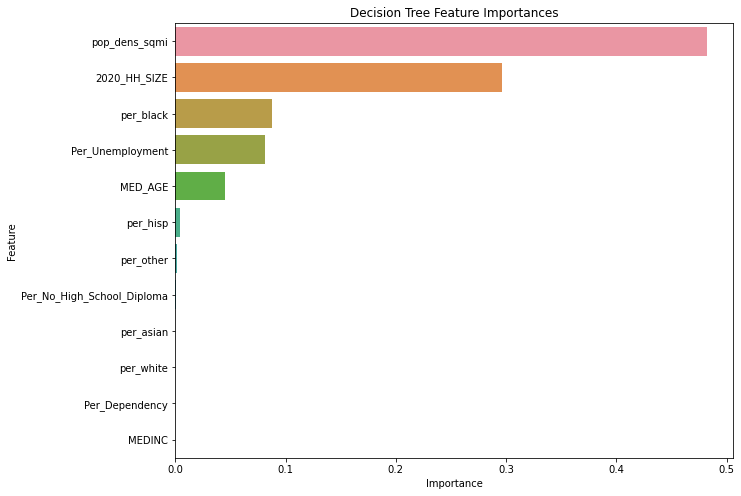

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the decision tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X, y)

# Extract feature importances
feature_importances = dt_model.feature_importances_

# Create a dataframe to store feature importances
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
dt_imp = df.loc[:, ['pop_dens_sqmi', '2020_HH_SIZE', 'Per_Unemployment', 'MEDINC', 'per_other', 'stop_dens_sqmi']]
dt_imp.head()

,pop_dens_sqmi,2020_HH_SIZE,Per_Unemployment,MEDINC,per_other,stop_dens_sqmi
0,2.301314,-1.128451,-0.836434,-0.472793,1.301235,54.891304
1,1.165326,0.665484,-0.778808,-0.052162,2.157760,55.524079
2,1.544641,-1.681458,-0.807621,-0.054291,0.702641,76.724138
3,0.348444,-0.903859,-0.937281,0.773854,2.268745,53.125000
4,0.526030,-0.368961,-1.268633,2.667351,1.638710,56.097561


In [34]:
dt_imp.to_csv('dt_imp.csv')